**Computational Intelligence Project <br>
Fuzzy C-Means Clustering <br>
Amirhossein Rajabpour <br>
Fall 2021**

## **Getting the Dataset**





In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import sys

In [2]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'Computational Intelligence Course/Project 2'

Mounted at /content/gdrive


In [3]:
path1 = base_dir + '/data1.csv'
data1 = np.genfromtxt(path1, delimiter=',')

In [4]:
path2 = base_dir + '/data2.csv'
data2 = np.genfromtxt(path2, delimiter=',')

In [5]:
path3 = base_dir + '/data3.csv'
data3 = np.genfromtxt(path3, delimiter=',')

In [6]:
path4 = base_dir + '/data4.csv'
data4 = np.genfromtxt(path4, delimiter=',')

## Fuzzy C-Means structure

Finding minimum and maximum in the given dataset

In [7]:
def find_max(dataset):
  cols = dataset.shape[1]
  max_in_dataset = -sys.maxsize
  for col in range(cols):
    if max(dataset[:, col]) > max_in_dataset:
      max_in_dataset = max(dataset[:, col])
  return max_in_dataset

In [8]:
def find_min(dataset):
  cols = dataset.shape[1]
  min_in_dataset = sys.maxsize
  for col in range(cols):
    if min(dataset[:, col]) < min_in_dataset:
      min_in_dataset = min(dataset[:, col])
  return min_in_dataset

Randomely choose a value for each dimmension (feature)

In [9]:
def initialize_centroids(dataset, k, minimum, maximum):
  cols = dataset.shape[1]
  centroids = np.array([np.array([random.uniform(minimum, maximum) for col in range(cols)]) for i in range(k)])
  return centroids

Calculate fuzziness for each point
<br>
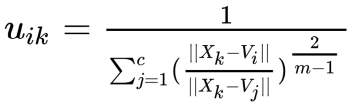

In [10]:
def update_data_fuzziness(dataset, centroids, m):
  u = np.array([[1 / np.sum([(np.linalg.norm(data - vi) / np.linalg.norm(data - vj)) ** (2 / (m - 1)) for vj in centroids]) for vi in centroids]for data in dataset], dtype='float64')  
  return u

Modifying means
<br>

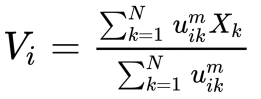

In [11]:
def modify_centroids(num_centroids, u, dataset, m):
  N = len(dataset)
  centroids = np.array([np.add.reduce([(u[k, i] ** m) * dataset[k] for k in range(N)]) / np.sum([u_[i] ** m for u_ in u]) for i in range(num_centroids)])
  return centroids

Calculating errors

In [12]:
def error_calculator(u, m, dataset, centroids):
  error = np.sum([np.sum([(u[j, i] ** m) * (np.linalg.norm(dataset[j] - centroids[i]) ** 2) 
            for i in range(len(centroids))]) 
      for j in range(len(dataset))])
  return error

Creating the model

In [13]:
def fuzzy_cmeans_model(dataset, k, num_iterations, m):
  minimum = find_min(dataset)
  maximum = find_max(dataset)

  centroids = initialize_centroids(dataset, k, minimum, maximum)

  for i in range(num_iterations):
    u = update_data_fuzziness(dataset, centroids, m)
    centroids = modify_centroids(len(centroids), u, dataset, m)
    error = error_calculator(u, m, dataset, centroids)

  return centroids, u, error

Plotting the results

In [14]:
def plot_results(dataset, u, centroids, k):
  plt.figure(figsize=(8,6))
  plt.scatter(dataset[:, 0], dataset[:, 1])
  for cluster in range(k):
      clusteredData = np.array([dataset[i] for i in range(len(dataset)) 
          if cluster == np.argmax(u[i])])
      plt.scatter(clusteredData[:, 0], clusteredData[:, 1])
  plt.scatter(centroids[:, 0], centroids[:, 1], color='black', s=100)
  plt.show()

In [15]:
def fuzzy_plot(dataset, u, centroids, k):
  plt.figure(figsize=(8,6))
  plt.scatter(dataset[:, 0], dataset[:, 1], c=u)
  plt.scatter(centroids[:, 0], centroids[:, 1], color='black', s=100)

## Impleneting algorithm for Dataset 1

In [ ]:
errors = []

for i in range(1,7):
  centroids, u, error = fuzzy_cmeans_model(dataset=data1, k=i, num_iterations=100, m=2)
  errors.append(error)

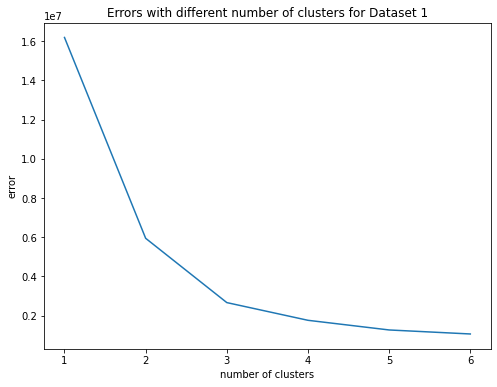

In [ ]:
plt.figure(figsize = (8,6))
plt.plot(np.arange(1, 7), errors)
plt.title('Errors with different number of clusters for Dataset 1')
plt.xlabel('number of clusters')
plt.ylabel('error')
plt.show()

We can see that k=3 is a good choice for number of clusters because error redauction rate is very low after that.

In [ ]:
centroids, u, error = fuzzy_cmeans_model(dataset=data1, k=3, num_iterations=100, m=2)

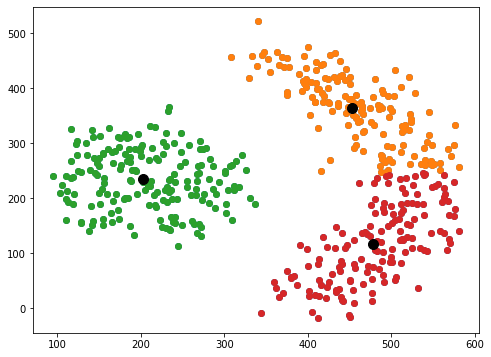

In [ ]:
plot_results(data1, u, centroids, k=3)

## Trying different values for `m`

In [16]:
errors = []

for i in range(2,12):
  centroids, u, error = fuzzy_cmeans_model(dataset=data1, k=3, num_iterations=100, m=i)
  errors.append(error)

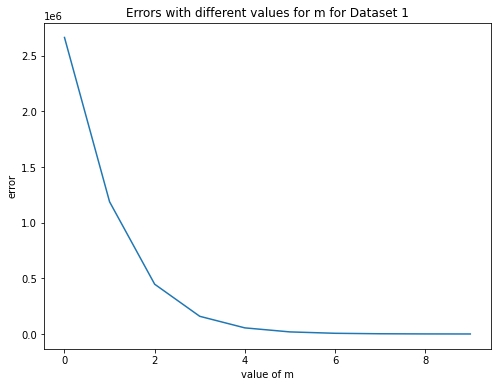

In [17]:
plt.figure(figsize = (8,6))
plt.plot(errors)
plt.title('Errors with different values for m for Dataset 1')
plt.xlabel('value of m')
plt.ylabel('error')
plt.show()

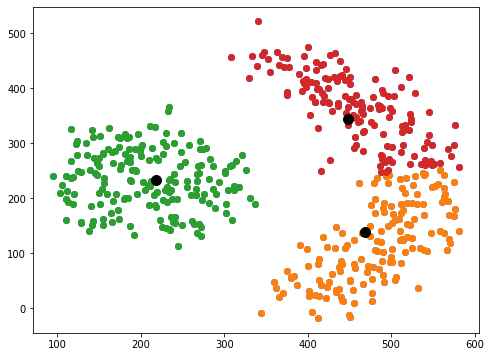

In [18]:
centroids, u, error = fuzzy_cmeans_model(dataset=data1, k=3, num_iterations=100, m=10)
plot_results(data1, u, centroids, k=3)

When we convert the fuzzy data into crisp data then there is no obvious change when we plot the data points.

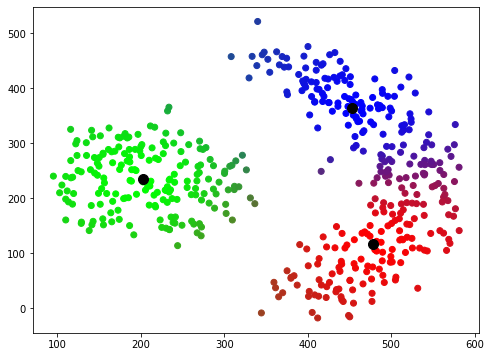

In [19]:
centroids, u, error = fuzzy_cmeans_model(dataset=data1, k=3, num_iterations=100, m=2)
fuzzy_plot(data1, u, centroids, k=3)

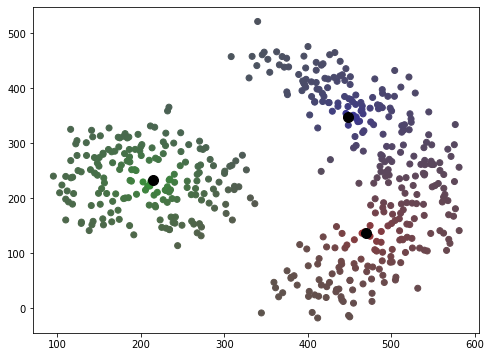

In [21]:
centroids, u, error = fuzzy_cmeans_model(dataset=data1, k=3, num_iterations=100, m=8)
fuzzy_plot(data1, u, centroids, k=3)

Now the difference is obvious! As `m` becomes larger (like `m=8`), data points belong less to one specific group but when `m` is small enough (For instance when `m=2`) clusters are completely detachable.

## Impleneting algorithm for Dataset 2

In [ ]:
errors = []

for i in range(1,7):
  centroids, u, error = fuzzy_cmeans_model(dataset=data2, k=i, num_iterations=100, m=2)
  errors.append(error)

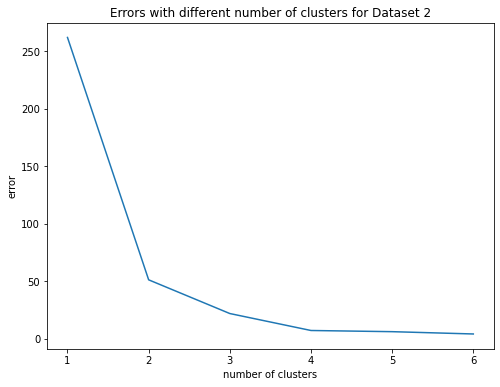

In [ ]:
plt.figure(figsize = (8,6))
plt.plot(np.arange(1, 7), errors)
plt.title('Errors with different number of clusters for Dataset 2')
plt.xlabel('number of clusters')
plt.ylabel('error')
plt.show()

Here k=3 seems like a good choice for number of clusters. After that there is not much reduction.

## Impleneting algorithm for Dataset 3

In [ ]:
errors = []

for i in range(1,7):
  centroids, u, error = fuzzy_cmeans_model(dataset=data3, k=i, num_iterations=100, m=2)
  errors.append(error)

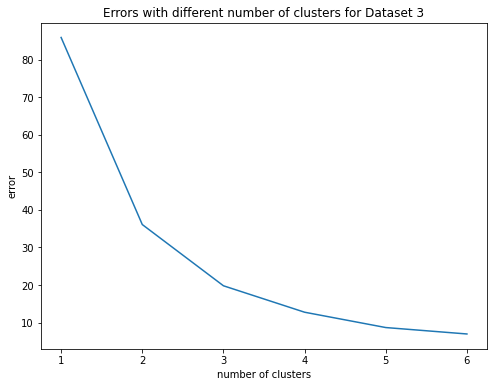

In [ ]:
plt.figure(figsize = (8,6))
plt.plot(np.arange(1, 7), errors)
plt.title('Errors with different number of clusters for Dataset 3')
plt.xlabel('number of clusters')
plt.ylabel('error')
plt.show()

For dataset 3 we can see that `k=4` is a good choice (but `k=3` looks good to so i'll try both) for number of clusters because error redauction rate is very low after that.

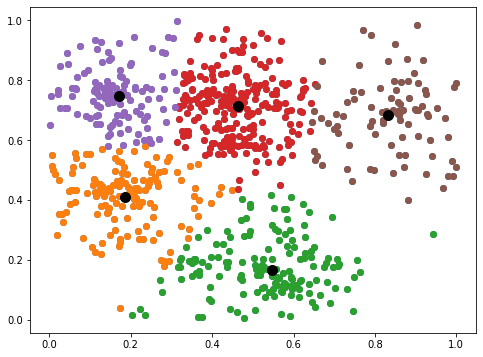

In [22]:
centroids, u, error = fuzzy_cmeans_model(dataset=data3, k=5, num_iterations=100, m=2)
plot_results(data3, u, centroids, k=5)

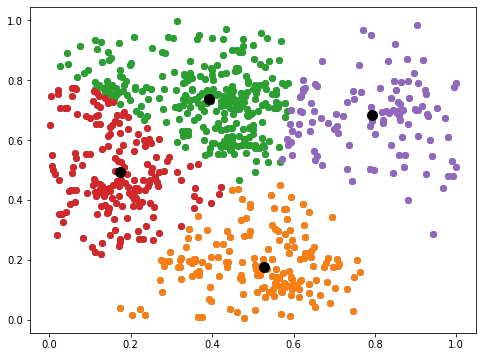

In [27]:
centroids, u, error = fuzzy_cmeans_model(dataset=data3, k=4, num_iterations=100, m=2)
plot_results(data3, u, centroids, k=4)

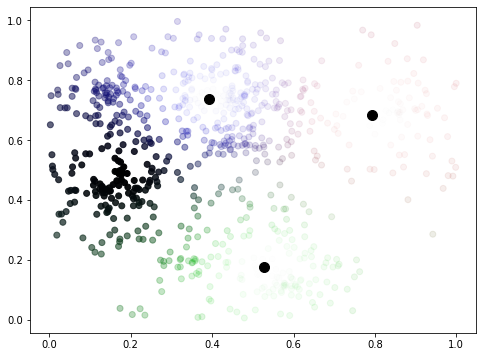

In [ ]:
centroids, u, error = fuzzy_cmeans_model(dataset=data3, k=4, num_iterations=100, m=2)
fuzzy_plot(data3, u, centroids, k=4)

lets try `k=3`

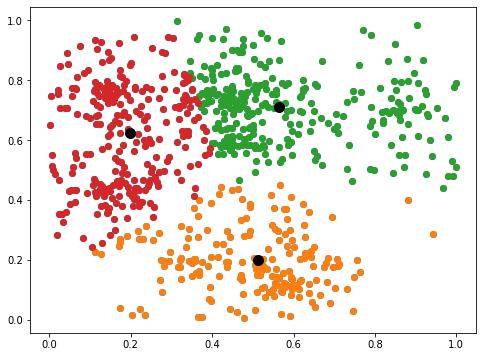

In [ ]:
centroids, u, error = fuzzy_cmeans_model(dataset=data3, k=3, num_iterations=100, m=2)
plot_results(data3, u, centroids, k=3)

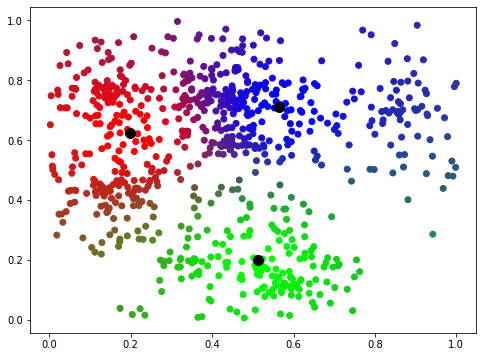

In [ ]:
centroids, u, error = fuzzy_cmeans_model(dataset=data3, k=3, num_iterations=100, m=2)
fuzzy_plot(data3, u, centroids, k=3)

## Impleneting algorithm for Dataset 4

In [ ]:
errors = []

for i in range(1,7):
  centroids, u, error = fuzzy_cmeans_model(dataset=data4, k=i, num_iterations=100, m=2)
  errors.append(error)

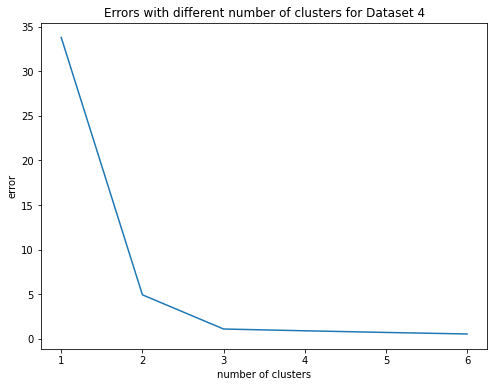

In [ ]:
plt.figure(figsize = (8,6))
plt.plot(np.arange(1, 7), errors)
plt.title('Errors with different number of clusters for Dataset 4')
plt.xlabel('number of clusters')
plt.ylabel('error')
plt.show()

Here k=3 is a good choice for number of clusters because error redauction rate is very low after that.